1. Importing Required Modules

In [196]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

2. Preparing/Collecting Data

In [197]:
data_dir = 'Project_Dataset\data'
image_exts = ['jpeg','jpg','png']

In [198]:
import itertools
t=""
PatternList = []


L = itertools.product('ABCDEFGHIJKLMNOPQRSTUVWXYZ',repeat=2)
for i in L:
    for c in i:
        t += c
    PatternList.append(t)
    t=""

PatternList = PatternList[0:41]

In [199]:
CharDict = {}

for image_class in os.listdir(data_dir):
    CharDict[PatternList[0]] = image_class
    PatternList = PatternList[1:len(PatternList)]

print(PatternList)
print(CharDict)

[]
{'AA': 'ਅ', 'AB': 'ਕ', 'AC': 'ਖ', 'AD': 'ਖ਼', 'AE': 'ਗ', 'AF': 'ਗ਼', 'AG': 'ਘ', 'AH': 'ਙ', 'AI': 'ਚ', 'AJ': 'ਛ', 'AK': 'ਜ', 'AL': 'ਜ਼', 'AM': 'ਝ', 'AN': 'ਞ', 'AO': 'ਟ', 'AP': 'ਠ', 'AQ': 'ਡ', 'AR': 'ਢ', 'AS': 'ਣ', 'AT': 'ਤ', 'AU': 'ਥ', 'AV': 'ਦ', 'AW': 'ਧ', 'AX': 'ਨ', 'AY': 'ਪ', 'AZ': 'ਫ', 'BA': 'ਫ਼', 'BB': 'ਬ', 'BC': 'ਭ', 'BD': 'ਮ', 'BE': 'ਯ', 'BF': 'ਰ', 'BG': 'ਲ', 'BH': 'ਲ਼', 'BI': 'ਵ', 'BJ': 'ਸ', 'BK': 'ਸ਼', 'BL': 'ਹ', 'BM': 'ੜ', 'BN': 'ੲ', 'BO': 'ੳ'}


In [200]:
for k in CharDict.keys():
    os.rename(f"{data_dir}\{CharDict[k]}",f"{data_dir}\{k}")

3. Loading the dataset

In [201]:
data = tf.keras.utils.image_dataset_from_directory('C:\CODE\Clg\MP_Project\Project_Dataset\data')

Found 451 files belonging to 41 classes.


In [202]:
data_iter = data.as_numpy_iterator()

In [203]:
batch = data_iter.next()

In [204]:
batch[0].shape

(32, 256, 256, 3)

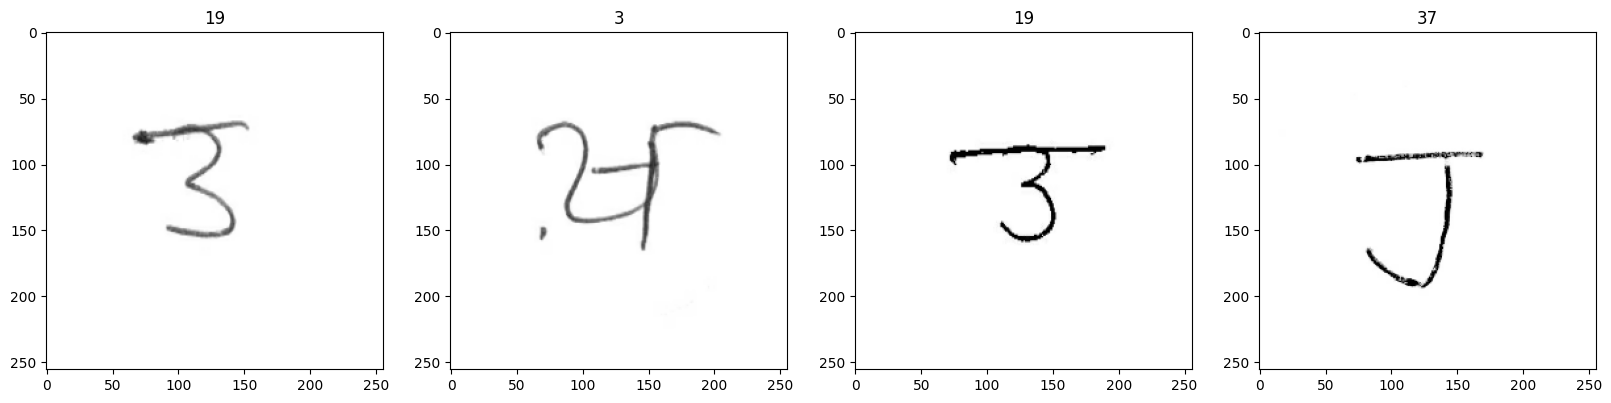

In [205]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. Preprocessing the data

In [206]:
data = data.map(lambda x,y:(x/255,y))

In [207]:
data.as_numpy_iterator().next()[0].max()

1.0

5. Splitting the data

In [208]:
len(data)

15

In [209]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [210]:
train_size+test_size+val_size

15

In [211]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(val_size)

In [212]:
len(train)+len(test)+len(val)

15

6. Building the Model

In [213]:
model = Sequential()

In [214]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(41, activation='softmax'))

In [215]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [216]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 16)      

7. Training Phase

In [217]:
logdir = 'logs'

In [218]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [219]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 13s 985ms/step - loss: 3.7559 - accuracy: 0.0188 - val_loss: 3.6983 - val_accuracy: 0.1771
Epoch 2/20
10/10 [==============================] - 9s 892ms/step - loss: 3.6847 - accuracy: 0.0969 - val_loss: 3.6128 - val_accuracy: 0.1042
Epoch 3/20
10/10 [==============================] - 9s 909ms/step - loss: 3.5165 - accuracy: 0.2094 - val_loss: 3.3833 - val_accuracy: 0.1667
Epoch 4/20
10/10 [==============================] - 10s 990ms/step - loss: 2.8374 - accuracy: 0.3688 - val_loss: 2.2361 - val_accuracy: 0.5729
Epoch 5/20
10/10 [==============================] - 10s 963ms/step - loss: 1.8280 - accuracy: 0.5844 - val_loss: 1.5732 - val_accuracy: 0.6667
Epoch 6/20
10/10 [==============================] - 10s 923ms/step - loss: 1.3635 - accuracy: 0.6656 - val_loss: 1.1270 - val_accuracy: 0.7188
Epoch 7/20
10/10 [==============================] - 10s 959ms/step - loss: 0.8895 - accuracy: 0.7906 - val_loss: 0.6008 - val_accuracy: 0.8542
E

8. Plot Performance

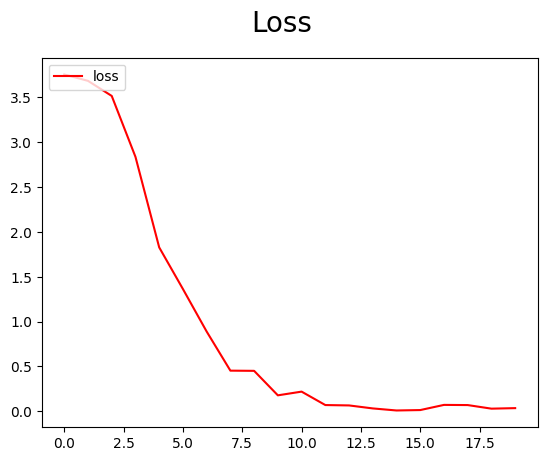

In [220]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

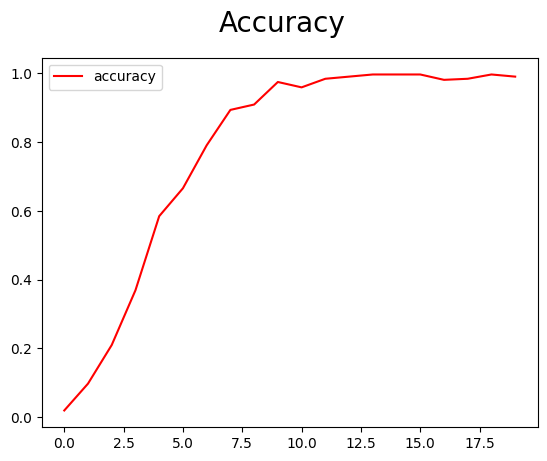

In [221]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Evaluating Performance

In [222]:
print(f"Accuracy: {hist.history['accuracy'][19]}\nLoss: {hist.history['loss'][19]}")

Accuracy: 0.9906250238418579
Loss: 0.03550081327557564


10. Test

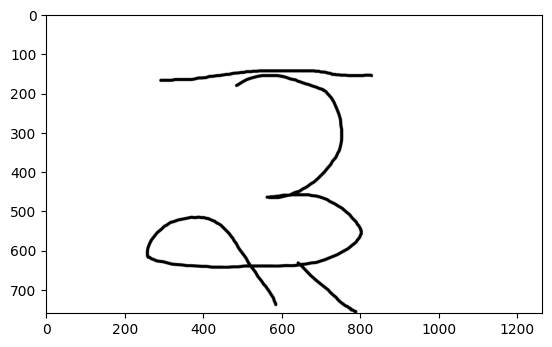

In [228]:
img = cv2.imread('Untitled.png')
plt.imshow(img)
plt.show()

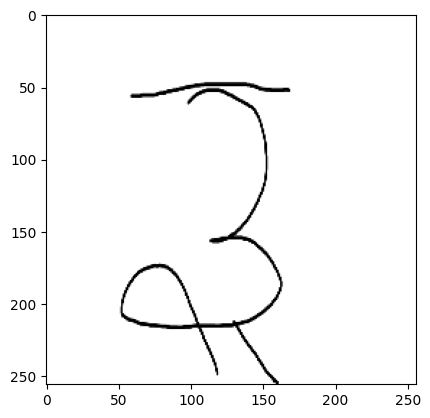

In [229]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [230]:
pred = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 60ms/step


In [231]:
print(CharDict[list(CharDict.keys())[np.argmax(pred)]])

ਭ


In [ ]:
for k in CharDict.keys():
    os.rename(f"{data_dir}\{k}",f"{data_dir}\{CharDict[k]}")